# LogisticRegression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("loan_data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

C:\Users\S Darshan Reddy\AppData\Local\Temp\ipykernel_8700\1477341455.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df["Gender"],palette="rocket")


<Axes: xlabel='count', ylabel='Gender'>

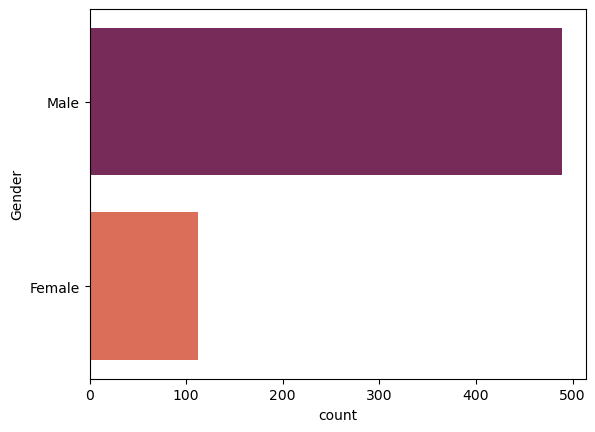

In [6]:
sns.countplot(df["Gender"],palette="rocket")

In [7]:
df["Gender"]=df["Gender"].fillna("Male")

In [8]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [17]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [19]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

C:\Users\S Darshan Reddy\AppData\Local\Temp\ipykernel_8700\566399531.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df["Dependents"],palette="rocket")


<Axes: xlabel='count', ylabel='Dependents'>

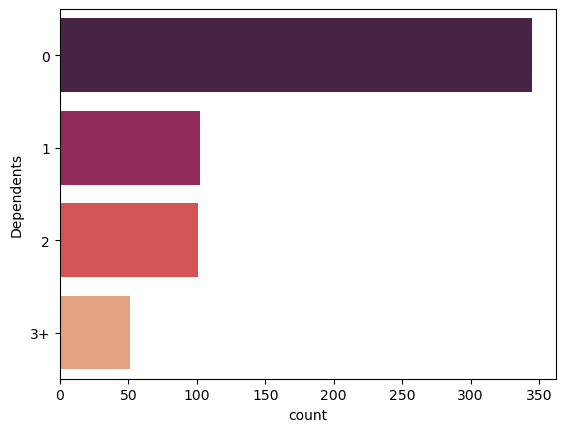

In [21]:
sns.countplot(df["Dependents"],palette="rocket")

In [23]:
df["Dependents"]=df["Dependents"].fillna(0)

In [25]:
df["Dependents"].isnull().sum()

0

In [27]:
df["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

C:\Users\S Darshan Reddy\AppData\Local\Temp\ipykernel_8700\2252617240.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df["Self_Employed"],palette="rocket")


<Axes: xlabel='count', ylabel='Self_Employed'>

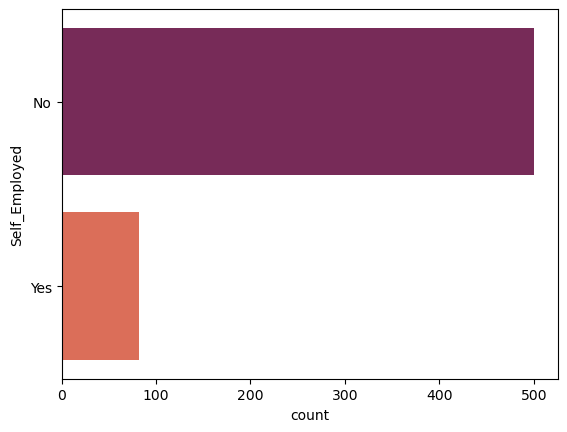

In [29]:
sns.countplot(df["Self_Employed"],palette="rocket")

In [31]:
df["Self_Employed"]=df["Self_Employed"].fillna("No")

In [33]:
df["Self_Employed"].unique()

array(['No', 'Yes'], dtype=object)

In [35]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [37]:
df["LoanAmount"].isnull().sum()

22

In [39]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [41]:
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].mean())

In [43]:
df["LoanAmount"].isnull().sum()

0

In [45]:
df["Loan_Amount_Term"].isnull().sum()

14

In [47]:
df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [49]:
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(360)

In [51]:
df["Loan_Amount_Term"].isnull().sum()

0

In [53]:
df["Credit_History"].isnull().sum()

50

In [55]:
df["Credit_History"].unique()

array([ 1.,  0., nan])

In [57]:
df["Credit_History"].mode()

0    1.0
Name: Credit_History, dtype: float64

In [59]:
df["Credit_History"]=df["Credit_History"].fillna(1)

In [61]:
df["Credit_History"].unique()

array([1., 0.])

In [1256]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [67]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

<Axes: xlabel='LoanAmount', ylabel='Count'>

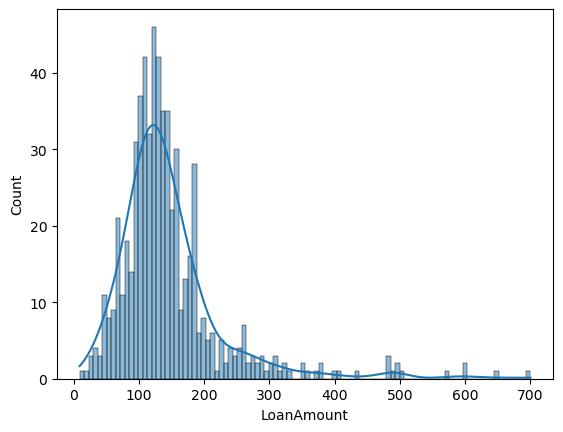

In [77]:
sns.histplot(df["LoanAmount"],kde=True,bins=100)

In [101]:
df1=df[df["LoanAmount"]>50]
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [103]:
df1.shape

(591, 13)

In [115]:
df2=df1[df1["LoanAmount"]<200]
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [117]:
df2.shape

(506, 13)

In [120]:
df2["LoanAmount"]=df2["LoanAmount"]*1000

C:\Users\S Darshan Reddy\AppData\Local\Temp\ipykernel_8700\3513551894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["LoanAmount"]=df2["LoanAmount"]*1000


In [122]:
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146412.162162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128000.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66000.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120000.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141000.000000,360.0,1.0,Urban,Y


<Axes: xlabel='ApplicantIncome', ylabel='Count'>

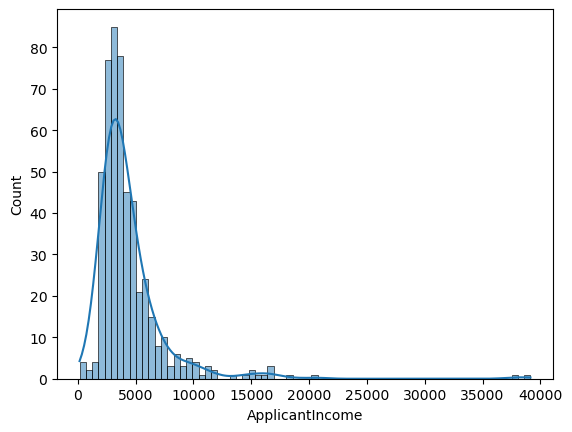

In [124]:
sns.histplot(df2['ApplicantIncome'],kde=True)

In [142]:
df3=df2[df2["ApplicantIncome"]<6000]
df3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146412.162162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128000.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66000.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120000.000000,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95000.000000,360.0,1.0,Urban,Y


In [162]:
df4=df3[df3["ApplicantIncome"]>1500]
df4.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146412.162162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128000.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66000.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120000.000000,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95000.000000,360.0,1.0,Urban,Y


In [164]:
df4.shape

(417, 13)

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

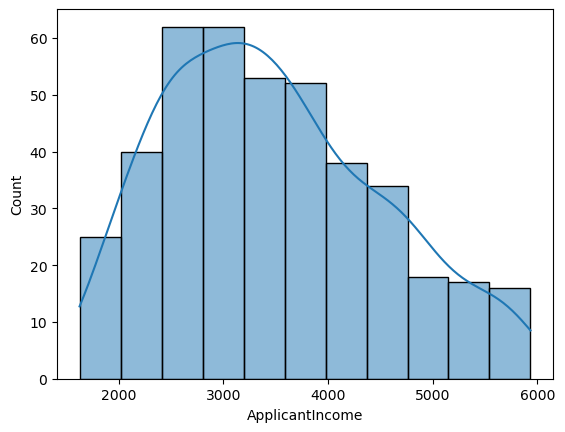

In [166]:
sns.histplot(df4['ApplicantIncome'],kde=True)

In [168]:
df5=df4.drop("Loan_ID",axis=1)

In [170]:
df5.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146412.162162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128000.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66000.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120000.000000,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95000.000000,360.0,1.0,Urban,Y


In [172]:
df5["Loan_Status"].replace("Y",1,inplace=True)
df5["Loan_Status"].replace("N",0,inplace=True)

C:\Users\S Darshan Reddy\AppData\Local\Temp\ipykernel_8700\888922610.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df5["Loan_Status"].replace("Y",1,inplace=True)
C:\Users\S Darshan Reddy\AppData\Local\Temp\ipykernel_8700\888922610.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [174]:
df5["Loan_Status"].value_counts()

Loan_Status
1    291
0    126
Name: count, dtype: int64

In [176]:
df5["Gender"]=df5["Gender"].map({"Male":1,"Female":0})
df5["Gender"].value_counts()

Gender
1    335
0     82
Name: count, dtype: int64

In [178]:
df5["Married"]=df5["Married"].map({"Yes":1,"No":0})
df5["Married"].value_counts()

Married
1.0    265
0.0    150
Name: count, dtype: int64

In [180]:
df5["Dependents"]=df5["Dependents"].map({"0":0,"1":1,"2":2,"3+":3})
df5["Dependents"].value_counts()

Dependents
0.0    246
2.0     65
1.0     63
3.0     30
Name: count, dtype: int64

In [182]:
df5["Education"]=df5["Education"].map({"Graduate":1,"Not Graduate":0})
df5["Education"].value_counts()

Education
1    306
0    111
Name: count, dtype: int64

In [184]:
df5["Self_Employed"]=df5["Self_Employed"].map({"Yes":1,"No":0})
df5["Self_Employed"].value_counts()

Self_Employed
0    380
1     37
Name: count, dtype: int64

In [186]:
df5["Property_Area"]=df5["Property_Area"].map({"Urban":2,"Rural":0,"Semiurban":1})
df5["Property_Area"].value_counts()

Property_Area
1    164
2    134
0    119
Name: count, dtype: int64

In [188]:
df5["Credit_History"].value_counts()

Credit_History
1.0    352
0.0     65
Name: count, dtype: int64

## Final Data

In [190]:
df5.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0.0,0.0,1,0,5849,0.0,146412.162162,360.0,1.0,2,1
1,1,1.0,1.0,1,0,4583,1508.0,128000.000000,360.0,1.0,0,0
2,1,1.0,0.0,1,1,3000,0.0,66000.000000,360.0,1.0,2,1
3,1,1.0,0.0,0,0,2583,2358.0,120000.000000,360.0,1.0,2,1
6,1,1.0,0.0,0,0,2333,1516.0,95000.000000,360.0,1.0,2,1


In [192]:
df5.shape

(417, 12)

In [194]:
df5.isnull().sum()

Gender                0
Married               2
Dependents           13
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [196]:
df5["Dependents"].unique()

array([ 0.,  1.,  3.,  2., nan])

In [198]:
df5["Dependents"]=df5["Dependents"].fillna(1)

In [200]:
df5["Dependents"].unique()

array([0., 1., 3., 2.])

In [202]:
df5["Married"]=df5["Married"].fillna(1)

In [204]:
df5.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0.0,0.0,1,0,5849,0.0,146412.162162,360.0,1.0,2,1
1,1,1.0,1.0,1,0,4583,1508.0,128000.000000,360.0,1.0,0,0
2,1,1.0,0.0,1,1,3000,0.0,66000.000000,360.0,1.0,2,1
3,1,1.0,0.0,0,0,2583,2358.0,120000.000000,360.0,1.0,2,1
6,1,1.0,0.0,0,0,2333,1516.0,95000.000000,360.0,1.0,2,1


In [206]:
df5.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [208]:
df5.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,0.803357,0.640288,0.709832,0.733813,0.088729,3474.501199,1573.124508,120123.728045,345.467626,0.844125,1.035971,0.697842
std,0.397937,0.480492,0.975530,0.442494,0.284694,1030.950211,2331.362674,31962.276941,63.239734,0.363173,0.779022,0.459745
min,0.000000,0.000000,0.000000,0.000000,0.000000,1625.000000,0.000000,53000.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2625.000000,0.000000,99000.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3340.000000,1508.000000,120000.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,4188.000000,2306.000000,144000.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,5935.000000,33837.000000,194000.000000,480.000000,1.000000,2.000000,1.000000


In [356]:
df5

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0.0,0.0,1,0,5849,0.0,146412.162162,360.0,1.0,2,1
1,1,1.0,1.0,1,0,4583,1508.0,128000.000000,360.0,1.0,0,0
2,1,1.0,0.0,1,1,3000,0.0,66000.000000,360.0,1.0,2,1
3,1,1.0,0.0,0,0,2583,2358.0,120000.000000,360.0,1.0,2,1
6,1,1.0,0.0,0,0,2333,1516.0,95000.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
606,1,1.0,1.0,1,0,3400,2500.0,173000.000000,360.0,1.0,1,1
607,1,1.0,2.0,0,0,3987,1411.0,157000.000000,360.0,1.0,0,1
608,1,1.0,0.0,1,0,3232,1950.0,108000.000000,360.0,1.0,0,1
609,0,0.0,0.0,1,0,2900,0.0,71000.000000,360.0,1.0,0,1


In [358]:
X=df5.iloc[:,:-1]
y=df5.iloc[:,-1]

In [360]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [362]:
classifier=LogisticRegression()

In [364]:
from sklearn.model_selection import GridSearchCV
parameters={"penalty":["l1","l2","elasticent"],"C":[1,2,3,4,5,6,10,20,30,40,50],"max_iter":[50,100,150]}

In [366]:
classifier_regressor=GridSearchCV(classifier,param_grid=parameters,scoring="accuracy",cv=5)

In [368]:
classifier_regressor.fit(X_train,y_train)

C:\Users\S Darshan Reddy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\S Darshan Reddy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [50, 100, 150],
                         'penalty': ['l1', 'l2', 'elasticent']},
             scoring='accuracy')

In [370]:
print(classifier_regressor.best_params_)

{'C': 2, 'max_iter': 150, 'penalty': 'l2'}


In [372]:
print(classifier_regressor.best_score_)

0.8344640434192673


In [376]:
### Predication
y_pred=classifier_regressor.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [378]:
## accuracy score
from sklearn.metrics import accuracy_score,classification_report

In [380]:
score=accuracy_score(y_pred,y_test)
print(score)

0.7857142857142857


In [297]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.36      0.82      0.50        11
           1       0.97      0.78      0.86        73

    accuracy                           0.79        84
   macro avg       0.66      0.80      0.68        84
weighted avg       0.89      0.79      0.82        84



## Decision Tree Classifier

In [323]:
X=df5.iloc[:,:-1]
y=df5.iloc[:,-1]


In [325]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0.0,0.0,1,0,5849,0.0,146412.162162,360.0,1.0,2
1,1,1.0,1.0,1,0,4583,1508.0,128000.000000,360.0,1.0,0
2,1,1.0,0.0,1,1,3000,0.0,66000.000000,360.0,1.0,2
3,1,1.0,0.0,0,0,2583,2358.0,120000.000000,360.0,1.0,2
6,1,1.0,0.0,0,0,2333,1516.0,95000.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
606,1,1.0,1.0,1,0,3400,2500.0,173000.000000,360.0,1.0,1
607,1,1.0,2.0,0,0,3987,1411.0,157000.000000,360.0,1.0,0
608,1,1.0,0.0,1,0,3232,1950.0,108000.000000,360.0,1.0,0
609,0,0.0,0.0,1,0,2900,0.0,71000.000000,360.0,1.0,0


In [606]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)


In [608]:
# Preprunning
parameter={
    "criterion":["gini","entropy","log_loss"],
    "splitter":["best","random"],
    "max_depth":[1,2,3,4,5],
    "max_features":["auto","sqft","log2"],
    "ccp_alpha":[1,2,3,4,5,6,7]
}

In [610]:
from sklearn.model_selection import GridSearchCV

In [612]:
from sklearn.tree import DecisionTreeClassifier

In [614]:
treemodel=DecisionTreeClassifier()
cv=GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring="accuracy")

In [616]:
cv.fit(X_train,y_train)

C:\Users\S Darshan Reddy\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
2100 fits failed out of a total of 3150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1050 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\S Darshan Reddy\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\S Darshan Reddy\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\S Darshan Reddy\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  Fil

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [1, 2, 3, 4, 5, 6, 7],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqft', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [618]:
cv.best_params_

{'ccp_alpha': 1,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'log2',
 'splitter': 'best'}

In [620]:
y_pred=cv.predict(X_test)

In [622]:
from sklearn import metrics 

In [624]:
score=(accuracy_score(y_pred,y_test))

In [628]:
score

0.7023809523809523

In [630]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.70      0.83        84

    accuracy                           0.70        84
   macro avg       0.50      0.35      0.41        84
weighted avg       1.00      0.70      0.83        84



C:\Users\S Darshan Reddy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\S Darshan Reddy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\S Darshan Reddy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [632]:
##Post prunning
from sklearn.tree import DecisionTreeClassifier

In [673]:
treemodel=DecisionTreeClassifier(max_depth=6)

In [675]:
treemodel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [677]:
from sklearn import tree

[Text(0.34375, 0.9285714285714286, 'x[9] <= 0.5\ngini = 0.423\nsamples = 333\nvalue = [101.0, 232.0]'),
 Text(0.15789473684210525, 0.7857142857142857, 'x[6] <= 6623.0\ngini = 0.137\nsamples = 54\nvalue = [50, 4]'),
 Text(0.13157894736842105, 0.6428571428571429, 'x[7] <= 159500.0\ngini = 0.107\nsamples = 53\nvalue = [50, 3]'),
 Text(0.07894736842105263, 0.5, 'x[8] <= 270.0\ngini = 0.043\nsamples = 46\nvalue = [45, 1]'),
 Text(0.05263157894736842, 0.35714285714285715, 'x[5] <= 2568.0\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.02631578947368421, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07894736842105263, 0.21428571428571427, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.10526315789473684, 0.35714285714285715, 'gini = 0.0\nsamples = 40\nvalue = [40, 0]'),
 Text(0.18421052631578946, 0.5, 'x[6] <= 1440.5\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.15789473684210525, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Te

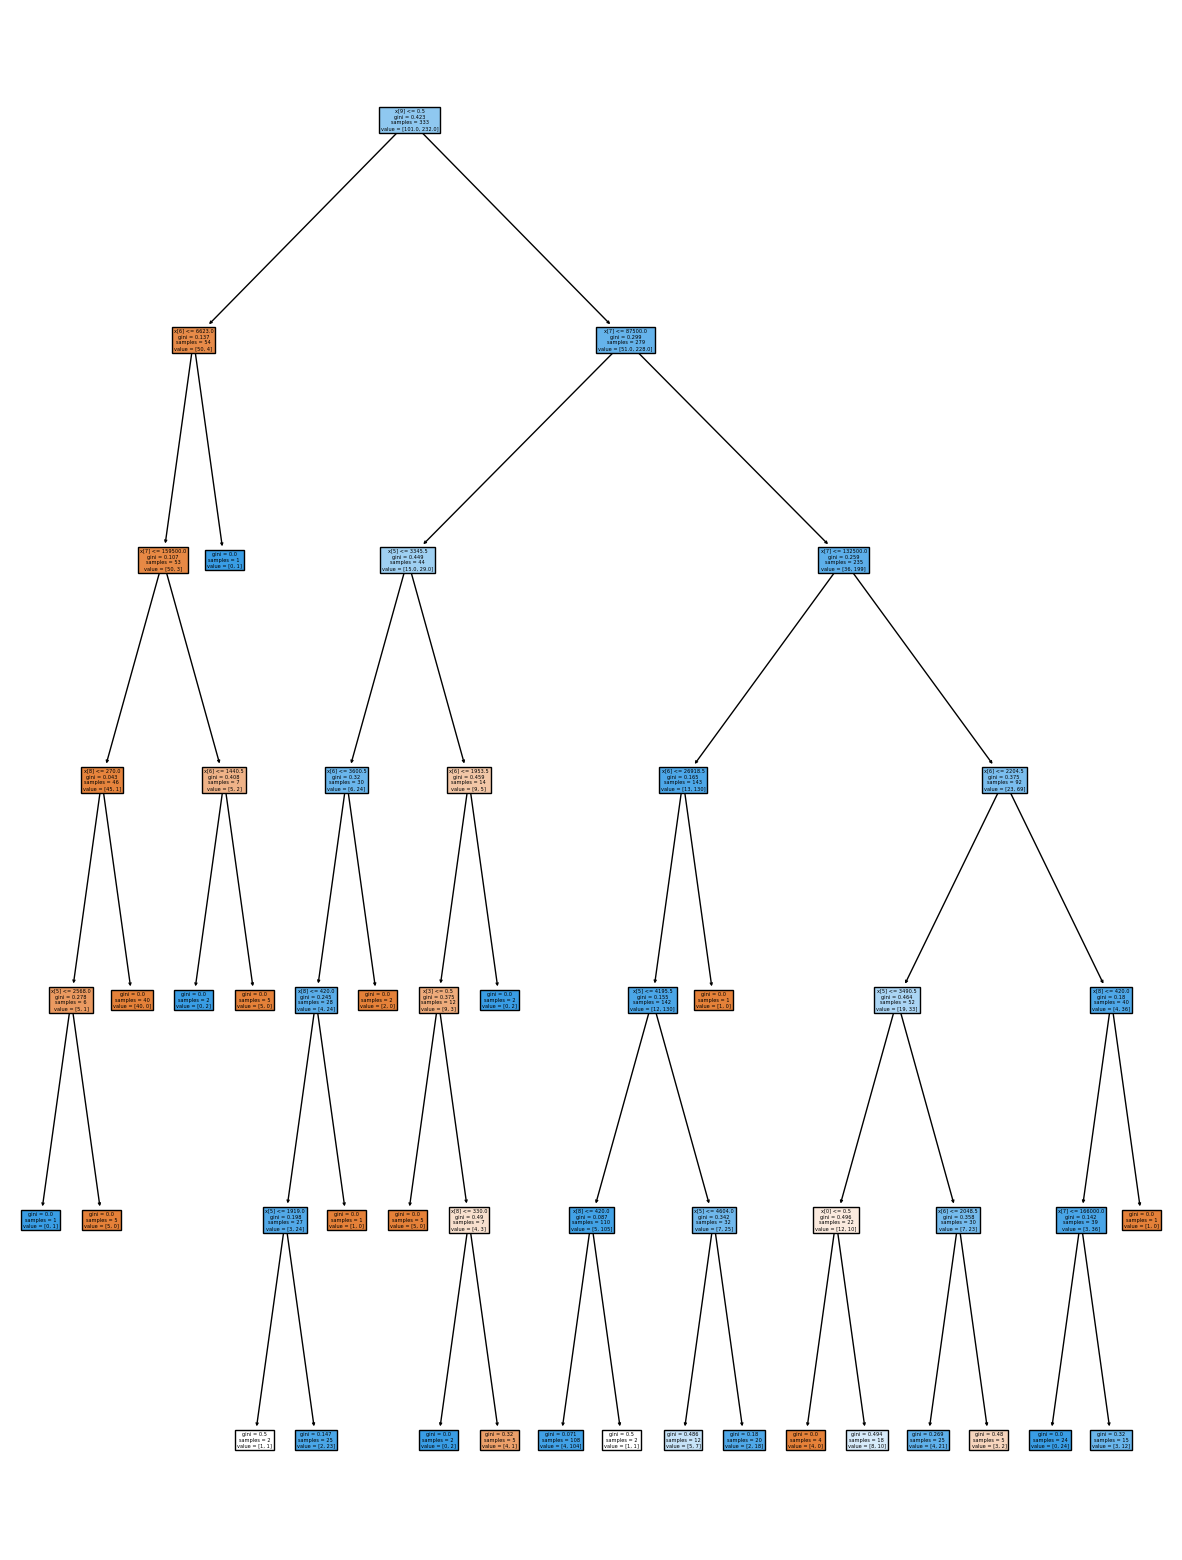

In [679]:
plt.figure(figsize=(15,20))
tree.plot_tree(treemodel,filled=True)

In [680]:
y_predd=treemodel.predict(X_test)

In [681]:
from sklearn import metrics 

In [682]:
score=(accuracy_score(y_predd,y_test))

In [683]:
score

0.7738095238095238

In [684]:
print(classification_report(y_predd,y_test))

              precision    recall  f1-score   support

           0       0.44      0.69      0.54        16
           1       0.92      0.79      0.85        68

    accuracy                           0.77        84
   macro avg       0.68      0.74      0.69        84
weighted avg       0.82      0.77      0.79        84

